# DSC550 Week 11.2 Exercise 
## Victoria Hall
## DSC550
## 2.23.2022


In [1]:
#import packages 
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf


In [2]:
tf.__version__

'2.3.0'

In [3]:
#Setting the color channels and setting random seed
#I had to set channel as last because of an issue with tensor flow and the image data order. 
#It only accepted NHWC due to the use of the CPU
K.set_image_data_format("channels_last")

np.random.seed(0)

In [4]:
#setting image information
channels = 1
height = 28
width = 28

In [5]:
#Loading data as training and test sets from the example data in Keras
(data_train,target_train),(data_test,target_test) = mnist.load_data()

In [6]:
#Reshaping
data_train = data_train.reshape(data_train.shape[0],height,width,channels)
data_test = data_test.reshape(data_test.shape[0],height,width,channels)

In [7]:
#loading libraries to look at images
from matplotlib import pyplot as plt

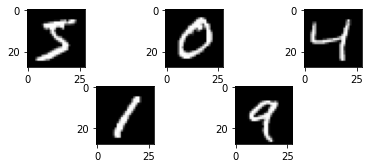

In [8]:
#using pyplot to look at the first 5 images in the dataset with the pixel data
for i in range(5):
    plt.subplot(350+1+i*2)
    plt.imshow(data_train[i],cmap=plt.get_cmap('gray'))

plt.show()

In [9]:
#Rescaling the pixel intensity which is a feature of the image so the training performance isn't diminished by obersvation values
#that are greater than the network params
features_train = data_train / 255
features_test = data_test / 255


In [10]:
#One hot encoding targets so each obs has 10 classes(digits 0-9)
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

In [11]:
#Starting the neural network
network = Sequential()

In [12]:
#Adding convolution later with 64 filters, a 5/5 window and ReLu Activation. Using a larger window that typical 3x3
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(height,width,channels),
                   activation='relu'))

In [13]:
network.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
#Adding a dropout layer to minimize chance of overfitting
network.add(Dropout(0.5))



In [15]:
#Flattening layer to convert inputs into a format that the full connected layer can use
network.add(Flatten())

In [16]:
#adding fully connected lay with Relu
network.add(Dense(128, activation="relu"))

In [17]:
#Adding dropout layer
network.add(Dropout(0.5))

In [18]:
network.add(Dense(number_of_classes, activation="softmax"))

In [19]:
#Compiling the network
network.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [20]:
#Training the model
network.fit(features_train, # Features
            target_train, # Target
            epochs=2, # Number of epochs
            batch_size=1000, # Number of observations per batch
            validation_data=(features_test, target_test)) # Data for evaluation

In [24]:
#importing packages for model evaluation
from sklearn.metrics import accuracy_score


In [26]:
#Predicting test target based on test features with network model
y_pred = network.predict(features_test)

In [28]:
#Getting integer labels to use in prediction
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(target_test)):
    test.append(np.argmax(target_test[i]))

In [51]:
a = accuracy_score(pred,test)
print('Accuracy is: {:.2%}'.format(a))

Accuracy is: 97.13%


In [42]:
#importing package to create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [43]:
matrix = confusion_matrix(pred,test)
matrix

array([[ 977,    0,    7,    0,    1,    2,   12,    1,   15,   11],
       [   0, 1124,    3,    0,    0,    1,    3,    2,    1,    6],
       [   0,    4,  999,    3,    4,    0,    1,   16,    4,    1],
       [   0,    1,    2,  976,    0,    1,    0,    2,    5,    7],
       [   0,    1,    2,    0,  965,    0,    3,    0,    5,   14],
       [   1,    0,    0,   14,    0,  882,    6,    0,    4,    8],
       [   0,    3,    0,    0,    4,    3,  931,    0,    6,    0],
       [   1,    1,   11,   11,    2,    1,    0, 1005,   12,   23],
       [   1,    1,    8,    6,    2,    2,    2,    2,  919,    4],
       [   0,    0,    0,    0,    4,    0,    0,    0,    3,  935]],
      dtype=int64)

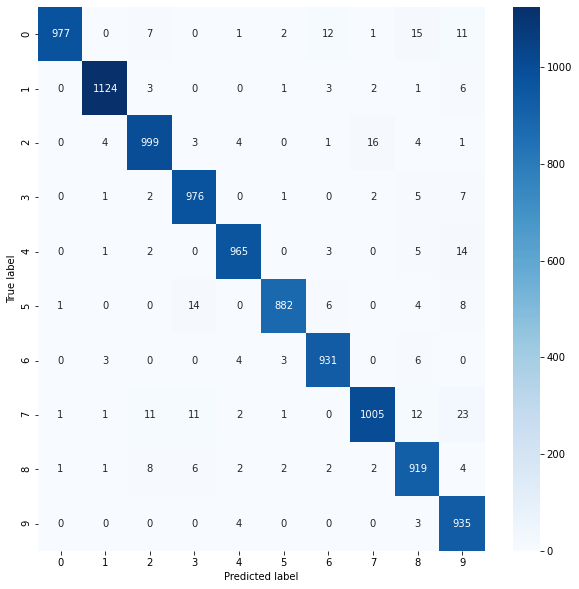

In [47]:
#plotting confusion matrix
figure = plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True,cmap=plt.cm.Blues, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The neural network was 97% accurate at determining the number in the picture as the correct number. Our confusion matrix shows what was misidentified. For exampe, 0 was misidentified as an eight 15 times. Overall, the network was successful in determining the number drawn in the picture for the vast majority of cases. 